In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from pathlib import Path

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 40)

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Исследование данных и их подготовка

In [19]:
train_values = pd.read_csv('train_values.csv',
                           index_col=0,
                           parse_dates=['timestamp'])

train_labels = pd.read_csv('train_labels.csv',
                           index_col=0)

test_values = pd.read_csv('test_values.csv',
                         index_col=0)

In [4]:
train_values.head(5)

,process_id,object_id,phase,timestamp,pipeline,supply_flow,supply_pressure,return_temperature,return_conductivity,return_turbidity,return_flow,supply_pump,supply_pre_rinse,supply_caustic,return_caustic,supply_acid,return_acid,supply_clean_water,return_recovery_water,return_drain,object_low_level,tank_level_pre_rinse,tank_level_caustic,tank_level_acid,tank_level_clean_water,tank_temperature_pre_rinse,tank_temperature_caustic,tank_temperature_acid,tank_concentration_caustic,tank_concentration_acid,tank_lsh_caustic,tank_lsh_acid,tank_lsh_clean_water,tank_lsh_pre_rinse,target_time_period
row_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,20001,405,pre_rinse,2018-04-15 04:20:47,L4,8550.348,0.615451,18.044704,4.990765,0.177228,15776.9100,True,True,False,False,False,False,False,False,True,True,55.499672,41.555992,44.026875,49.474102,32.385708,83.036750,73.03241,45.394646,44.340126,False,0.0,False,0.0,False
1,20001,405,pre_rinse,2018-04-15 04:20:49,L4,11364.294,0.654297,18.229168,3.749680,0.122975,13241.4640,True,True,False,False,False,False,False,False,True,True,55.487920,41.624170,44.045685,49.457645,32.385708,83.015045,73.03241,45.394447,44.339380,False,0.0,False,0.0,False
2,20001,405,pre_rinse,2018-04-15 04:20:51,L4,12174.479,0.699870,18.395544,2.783954,0.387008,10698.7850,True,True,False,False,False,False,False,False,True,True,55.476166,41.638275,44.045685,49.462350,32.385708,83.015045,73.03241,45.396280,44.336735,False,0.0,False,0.0,False
3,20001,405,pre_rinse,2018-04-15 04:20:53,L4,13436.776,0.761502,18.583622,1.769353,0.213397,8007.8125,True,True,False,False,False,False,False,False,True,True,55.471466,41.647675,44.048030,49.462350,32.385708,83.036750,73.03241,45.401875,44.333110,False,0.0,False,0.0,False
4,20001,405,pre_rinse,2018-04-15 04:20:55,L4,13776.766,0.837240,18.627026,0.904020,0.148293,6004.0510,True,True,False,False,False,False,False,False,True,True,55.459705,41.654730,44.048030,49.462350,32.385708,83.015045,73.03241,45.398197,44.334373,False,0.0,False,0.0,False


Все измерения подробно описываются в прилагаемом отчете.

Рассмотрим внимательнее некоторый конкретный процесс.

In [5]:
process = train_values[train_values.process_id == 20001]

Разобьем наш процесс на 5 этапов.

In [6]:
process['phase'].unique()

array(['pre_rinse', 'caustic', 'intermediate_rinse', 'acid',
       'final_rinse'], dtype=object)

In [7]:
pre_rinse = process[process.phase == 'pre_rinse']
caustic = process[process.phase == 'caustic']
intermediate_rinse = process[process.phase == 'intermediate_rinse']
acid = process[process.phase == 'acid']
final_rinse = process[process.phase == 'final_rinse']

Смотрим количество измерений на каждом этапе. Поскольку измерения проводятся каждые 2 секунды, можно оценить длительность каждого этапа.

In [8]:
print(pre_rinse.shape,
caustic.shape,
intermediate_rinse.shape,
acid.shape,
final_rinse.shape)

(265, 35) (728, 35) (65, 35) (367, 35) (207, 35)


Построим графики различных показателей на разных этапах. Возможно, мы сможем увидеть различные особенности их изменения.

In [9]:
def build_features_graphs(phase): # функция для построения графиков основных количественных признаков
    _, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 19))

    ax[0][0].plot(phase.supply_flow)
    ax[0][0].set_title('supply_flow')

    ax[0][1].plot(phase.supply_pressure)
    ax[0][1].set_title('supply_pressure')

    ###

    ax[1][0].plot(phase.return_temperature)
    ax[1][0].set_title('return_temperature')

    ax[1][1].plot(phase.return_conductivity)
    ax[1][1].set_title('return_conductivity')

    ax[2][0].plot(phase.return_turbidity)
    ax[2][0].set_title('return_turbidity')

    ax[2][1].plot(phase.return_flow)
    ax[2][1].set_title('return_flow')

    ###

    ax[3][0].plot(phase.tank_level_pre_rinse)
    ax[3][0].set_title('tank_level_pre_rinse')

    ax[3][1].plot(phase.tank_level_acid)
    ax[3][1].set_title('tank_level_acid')

    ax[4][0].plot(phase.tank_level_caustic)
    ax[4][0].set_title('tank_level_caustic')

    ax[4][1].plot(phase.tank_level_clean_water)
    ax[4][1].set_title('tank_level_clean_water')

### Этап "pre_rinse"

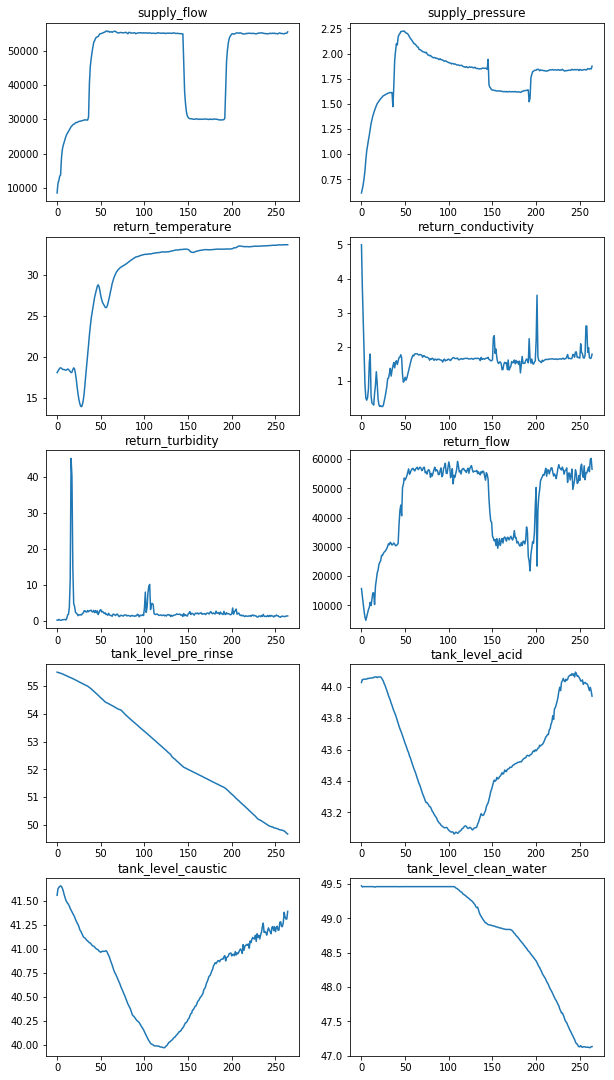

In [10]:
build_features_graphs(pre_rinse)

### Этап "caustic"

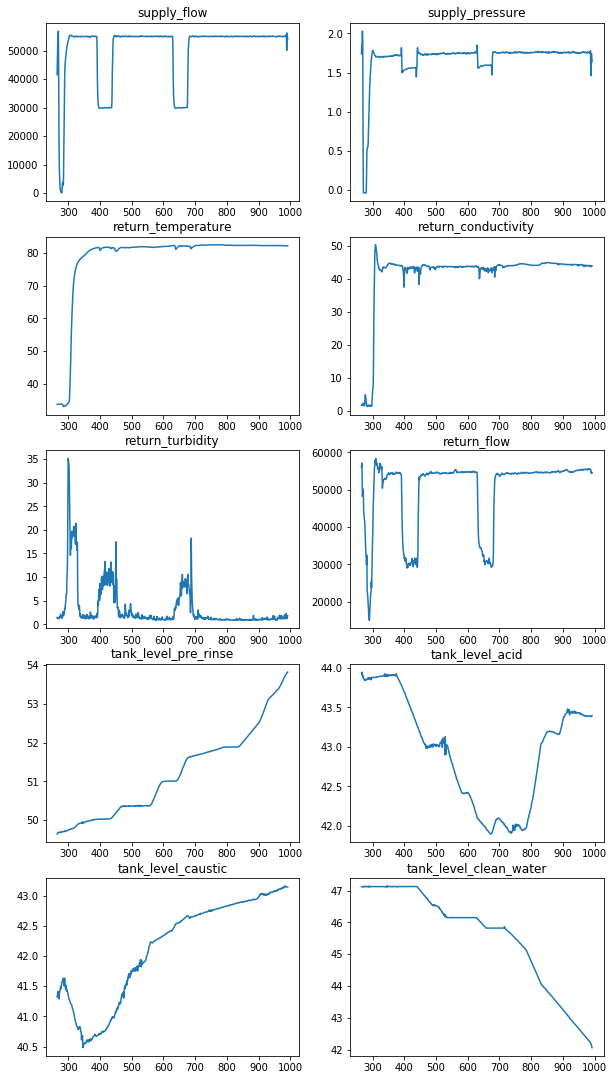

In [11]:
build_features_graphs(caustic)

### Этап "intermediate_rinse"

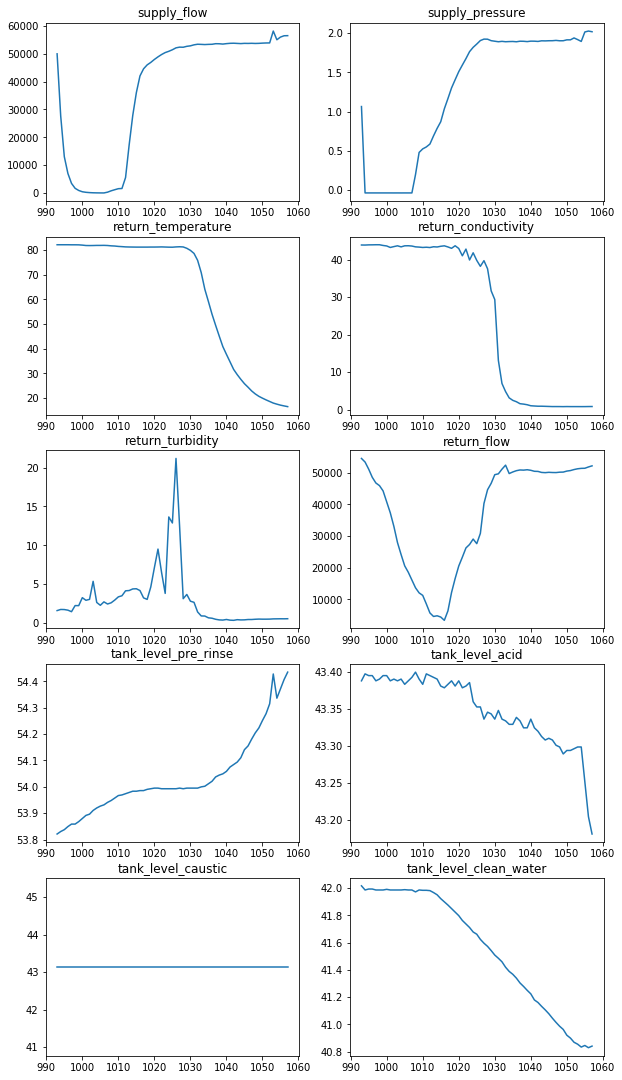

In [12]:
build_features_graphs(intermediate_rinse)

### Этап "acid"

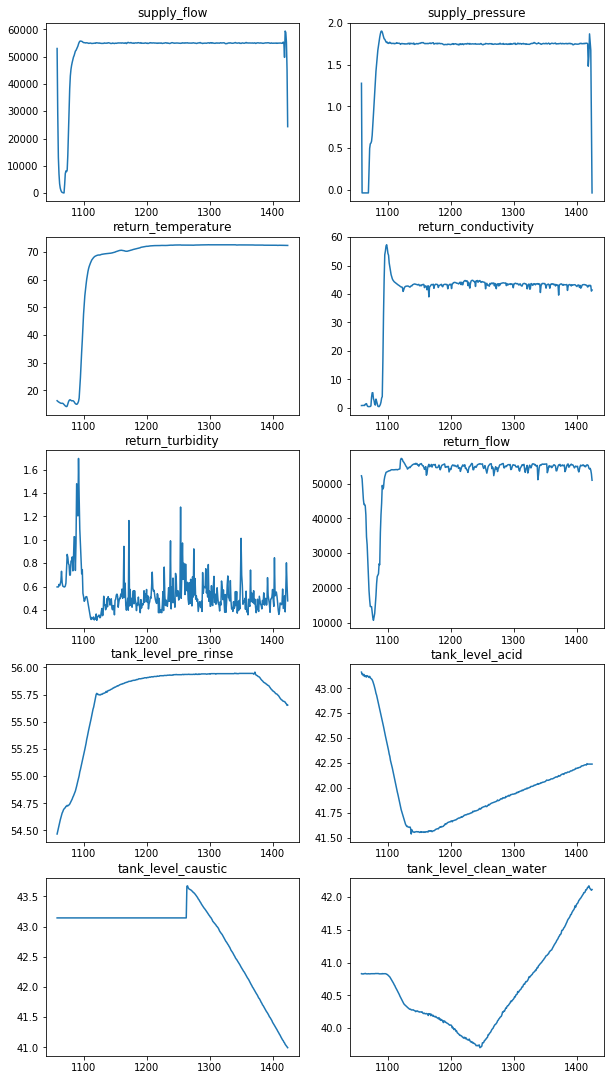

In [13]:
build_features_graphs(acid)

### Этап "final_rinse"

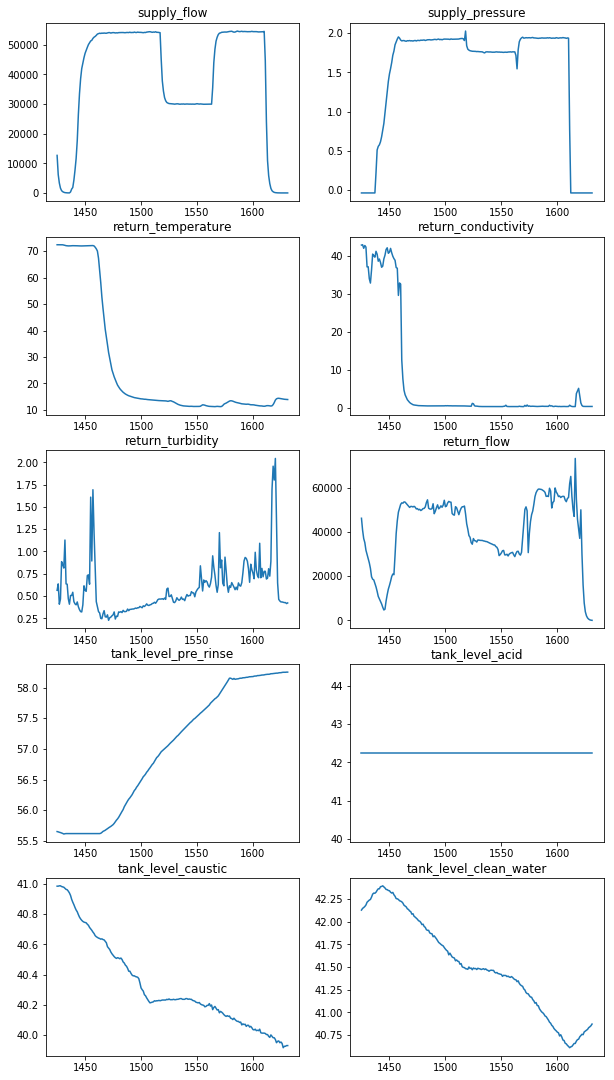

In [14]:
build_features_graphs(final_rinse)

На многих графиках видим ярко выраженные тренды и циклы, сезонности не наблюдается. Другие же ряды представляют собой что-то, похожее на шум. Большинство рядов стационарными не являются.

Сравним количество измерений с каким-нибудь другим процессом.

In [15]:
process2 = train_values[train_values.process_id == 20003]

In [16]:
print(process2[process2.phase == 'pre_rinse'].shape,
process2[process2.phase == 'caustic'].shape,
process2[process2.phase == 'intermediate_rinse'].shape,
process2[process2.phase == 'acid'].shape,
process2[process2.phase == 'final_rinse'].shape,
)

(397, 35) (971, 35) (139, 35) (610, 35) (600, 35)


Видим, что число измерений показателей в процессе 20003 отличается от их числа для процесса 20001, который мы смотрели выше. Вывод - данные надо будет как-то приводить к общему виду.

Попробуем модернизировать публичное решение - высчитывать разные статистические характеристики рядов, при этом учитывая разбиение на этапы, тем самым повышая точность.

Разберемся сначала с признаком **pipeline**.

Проверим, как связаны между собой **process_id** и **pipeline**.

In [18]:
# Для обучающей выборки
a = 0
for pid in train_values['process_id'].unique():
    process = train_values[train_values.process_id == pid]
    if process['pipeline'].nunique() == 1:
        a = a + 1
print(a, train_values['process_id'].nunique())

5021 5021


In [20]:
# Для тестовой выборки
a = 0
for pid in test_values['process_id'].unique():
    process = test_values[test_values.process_id == pid]
    if process['pipeline'].nunique() == 1:
        a = a + 1
print(a, test_values['process_id'].nunique())

2967 2967


Как видим, при фиксированном процессе трубопровод также фиксирован. Организатор это не указал, а мы теперь знаем.

Обратим теперь внимание на признак **object_id**. Вполне вероятно, что объекты могут быть разных категорий, и процесс очистки будет зависить от типа объекта.
Проверим - существуют ли такие объекты в тестовой выборке, процессы очистки которых были в обучающей.

In [21]:
obj_train = train_values['object_id'].unique()
obj_test = test_values['object_id'].unique()

In [22]:
np.intersect1d(obj_test, obj_train)

array([102, 103, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 204,
       205, 210, 211, 212, 213, 214, 215, 216, 217, 300, 301, 302, 303,
       304, 305, 306, 308, 309, 405, 409, 420, 421, 424, 426, 427, 428,
       429, 431, 434, 435, 436, 437, 438, 911, 912, 913, 914, 917, 918,
       919, 921, 922, 923, 924, 925, 926, 930, 932, 933, 934, 938, 940,
       941, 942, 943, 944, 945, 946, 950, 951, 952, 953, 954, 955, 956,
       957, 958, 959, 960, 961, 962, 963, 964, 965, 966], dtype=int64)

In [23]:
np.intersect1d(obj_test, obj_train).shape == obj_test.shape

True

Как видим число объектов в пересечении совпадает с числом объектов в тестовой выборке, так что гипотеза подтвердилась. Более того, теперь мы знаем, что каждый объект, который представлен в тестовой выборке, уже проходил процесс очистки в обучающей выборке. Стоит добавить этот признак **object_id** в финальную обучающую выборку, он может нести в себе некоторую информацию.

### Исследование дополнительных данных

Организатор соревнования предоставил дополнительную информацию - план очистки для каждого процесса. Дело в том, что, как можно видеть в таблице выше, для некоторых процессов некоторые этапы пропускатся. Именно набор этапов, которые предусмотрены для данного процесса, и составляет план. Планы известны для всех процессов, т.е. как для обучающей выборки, так и для тестовой.

In [25]:
recipe = pd.read_csv('./recipe_metadata.csv')

In [26]:
recipe.head(6)

,process_id,pre_rinse,caustic,intermediate_rinse,acid,final_rinse
0,20000,1,1,1,1,1
1,20001,1,1,1,1,1
2,20002,1,1,0,0,1
3,20003,1,1,1,1,1
4,20004,1,1,1,1,1
5,20005,1,0,0,1,1


Посмотрим, какие комбинации возможны.

In [27]:
print(recipe.shape, recipe[recipe.pre_rinse == 1].shape)

(7988, 6) (7988, 6)


Этап **pre_rinse** есть у всех, этап **final_rinse** нам не интересен. Остается проверить комбинации трех промежуточных фаз.

In [29]:
for i in [0, 1]:
    for j in [0, 1]:
        for k in [0, 1]:
            print(recipe[(recipe.caustic == i) & 
                         (recipe.intermediate_rinse == j) & 
                         (recipe.acid == k)].shape, i, j, k)

(0, 6) 0 0 0
(315, 6) 0 0 1
(0, 6) 0 1 0
(0, 6) 0 1 1
(1644, 6) 1 0 0
(0, 6) 1 0 1
(0, 6) 1 1 0
(6029, 6) 1 1 1


Как видим, больше всего объектов проходит через все стадии очистки.<br>
Второй по популярности вариант - **pre_rinse** - **caustic** - **final_rinse**<br>
И последний вариант - **pre_rinse** - **acid** - **final_rinse**<br><br>
Также организаторы отмечают, что возможны расхождения этого плана с реальностью. Проверим на обучающей выборке, насколько "рецепты" соответствуют действительности.

In [31]:
def check_accuracity(recipe):
    a = 0
    for pid in train_values['process_id'].unique():
        real_recipe = train_values[train_values.process_id == pid]['phase'].unique()
        myarr = np.array([0, 0, 0, 0, 0])
        for i, pname in enumerate(recipe.columns[1:]):
            if pname in real_recipe:
                myarr[i] = 1
        theor_recipe = recipe[recipe.process_id == pid]
        myarr2 = theor_recipe.iloc[0].values[1:]
        if not np.array_equal(myarr, myarr2):
            a += 1
    return a

In [32]:
a = check_accuracity(recipe)

In [34]:
print(a / train_values['process_id'].nunique())

0.056363274248157735


Расхождения **5.6%**.  Логично ожидать такую же точность для тестовой выборки.

В финальном решении дополнительные данные не используются. Эта часть была приведена ради теоретического интереса. Подробнее см. в отчете.

## Feature engineering

Перед началом работы, выбросим из обучающей выборки сведения о финальной фазе, поскольку мы не будем их использовать.

In [3]:
train_values = train_values[train_values.phase != 'final_rinse']

Приступим к создании матрицы объект-признак.

Создание метапризнаков.

In [4]:
train_values['process_phase'] = train_values.process_id.astype(str) + '_' + train_values.phase.astype(str)
process_phases = train_values.process_phase.unique()

# randomly select 80% of phases to keep
rng = np.random.RandomState(2019)
to_keep = rng.choice(
                process_phases,
                size=np.int(len(process_phases) * 1.0),
                replace=False)

train_limited = train_values[train_values.process_phase.isin(to_keep)]

# subset labels to match our training data
train_labels = train_labels.loc[train_limited.process_id.unique()]

In [5]:
def prep_metadata(df):
    # select process_id and pipeline
    meta = df[['process_id', 'pipeline']].drop_duplicates().set_index('process_id') 
    
    # convert categorical pipeline data to dummy variables
    meta = pd.get_dummies(meta)
    
    # pipeline L12 not in test data
    if 'L12' not in meta.columns:
        meta['pipeline_L12'] = 0
    
    # calculate number of phases for each process_object
    meta['num_phases'] = df.groupby('process_id')['phase'].apply(lambda x: x.nunique())
    meta['object'] = df[['process_id', 'object_id']].drop_duplicates().set_index('process_id')
    
    return meta

# show example for first 5,000 observations
prep_metadata(train_limited.head(5000))

,pipeline_L3,pipeline_L4,pipeline_L7,pipeline_L12,num_phases,object
process_id,,,,,,
20001,0,1,0,0,4,405
20002,1,0,0,0,2,301
20003,1,0,0,0,4,306
20004,0,0,1,0,4,921
20005,0,0,1,0,1,926


Создание количественных признаков, описывающих статистические характеристики измеряемых во временном ряде показателей.

In [6]:
ts_cols = [
    'process_id',
    'phase',
    'supply_flow',
    'supply_pressure',
    'return_temperature',
    'return_conductivity',
    'return_turbidity',
    'return_flow',
    'tank_level_pre_rinse',
    'tank_level_caustic',
    'tank_level_acid',
    'tank_level_clean_water',
    'tank_temperature_pre_rinse',
    'tank_temperature_caustic',
    'tank_temperature_acid'
]

In [7]:
def tail_mean(x):
    return x.tail(7).mean()

In [8]:
def head_mean(x):
    return x.head(7).mean()

In [9]:
def mid_mean(x):
    t = x.shape[0] // 2
    return x[(t-4) : (t+6)].mean()

In [10]:
def difference(x):
    return x.max() - x.min()

In [11]:
def prep_time_series_features(df, columns=None):
    if columns is None:
        columns = df.columns
    
    ts_df = df[ts_cols].set_index('process_id')
    
    # create features: min, max, mean, standard deviation, and mean of the last five observations
    ts_features = ts_df.groupby(['process_id', 'phase']).agg([difference, 'mean', 'std', mid_mean, tail_mean, head_mean])
    
    return ts_features.unstack('phase')

# show example for first 5,000 observations
prep_time_series_features(train_limited.head(5000), columns=ts_cols)

supply_flow                                              \
               difference                                               
phase                acid       caustic intermediate_rinse  pre_rinse   
process_id                                                              
20001        59349.683324  56825.082733        58123.55661  47124.562   
20002                 NaN  34288.196204                NaN  24262.153   
20003       104340.283000  40042.677960        37369.79290  35065.831   
20004        48437.500780  48307.292780        34100.11778  34693.285   
20005        31116.176000           NaN                NaN        NaN   

                                                                         \
                    mean                                                  
phase               acid       caustic intermediate_rinse     pre_rinse   
process_id                                                                
20001       52253.081264  50442.632617       36914.117953  46193.399008   
20002                NaN  27431.096723                NaN  22290.798688   
20003       30775.125050  30649.036188       20863.101197  32848.432234   
20004       30079.839134  33709.069273       12009.866074  34579.060488   
20005       27279.443219           NaN                NaN           NaN   

                                                                         \
                     std                                                  
phase               acid       caustic intermediate_rinse     pre_rinse   
process_id                                                                
20001       10731.966484  10870.255265       22791.587753  12709.809880   
20002                NaN   8253.658404                NaN   8407.087366   
20003       11883.312076   8530.790060       15753.774123   5532.787842   
20004       14106.411829  10536.076240       13108.397249   7723.018544   
20005        8100.076655           NaN                NaN           NaN   

                                                                   \
              mid_mean                                              
phase             acid     caustic intermediate_rinse   pre_rinse   
process_id                                                          
20001       55006.5110  46653.6451        51363.93370  55047.0196   
20002              NaN  29988.4262                NaN  26405.5267   
20003       24543.5474  33666.4482          575.44849  28188.2962   
20004       37232.3488  33845.4863          908.56478  33308.7391   
20005       30705.2950         NaN                NaN         NaN   

                                                                         \
               tail_mean                                                  
phase               acid       caustic intermediate_rinse     pre_rinse   
process_id                                                                
20001       49652.778429  54486.503143       55692.996857  55036.271714   
20002                NaN  29766.038857                NaN  28754.340429   
20003       29814.608286  23453.517000       35921.483286  36741.485000   
20004       36264.054143  32678.156857       27366.484571  34474.206857   
20005       30889.343857           NaN                NaN           NaN   

              ...     tank_temperature_acid                                \
              ...                      mean                                 
phase         ...                      acid    caustic intermediate_rinse   
process_id    ...                                                           
20001         ...                 72.994365  72.536153          73.083211   
20002         ...                       NaN  73.110743                NaN   
20003         ...                 72.360726  72.501544          72.545298   
20004         ...                 72.767215  72.518806          72.877676   
20005         ...                 72.605537        NaN                NaN   

            

Мы сгенерировали некоторое количество признаков, описывающие показатели очистки процессов на разных этапов. Теперь пора собрать все полученные данные в датасет, который будет принимать модель.

In [12]:
def create_feature_matrix(df):
    metadata = prep_metadata(df)
    time_series = prep_time_series_features(df)
    
    # join metadata and time series features into a single dataframe
    feature_matrix = pd.concat([metadata, time_series], axis=1)
    
    return feature_matrix

In [13]:
train_features = create_feature_matrix(train_limited)

Ограничиваем выборку. Обоснование см. в отчете.

In [14]:
train_features = train_features[train_labels.final_rinse_total_turbidity_liter < 900000]

Заполняем недостающие данные.

In [15]:
train_features.fillna(train_features.median(), inplace=True)

In [16]:
train_features.head()

,pipeline_L1,pipeline_L10,pipeline_L11,pipeline_L12,pipeline_L2,pipeline_L3,pipeline_L4,pipeline_L6,pipeline_L7,pipeline_L8,pipeline_L9,num_phases,object,"(supply_flow, difference, acid)","(supply_flow, difference, caustic)","(supply_flow, difference, intermediate_rinse)","(supply_flow, difference, pre_rinse)","(supply_flow, mean, acid)","(supply_flow, mean, caustic)","(supply_flow, mean, intermediate_rinse)",...,"(tank_temperature_acid, mean, acid)","(tank_temperature_acid, mean, caustic)","(tank_temperature_acid, mean, intermediate_rinse)","(tank_temperature_acid, mean, pre_rinse)","(tank_temperature_acid, std, acid)","(tank_temperature_acid, std, caustic)","(tank_temperature_acid, std, intermediate_rinse)","(tank_temperature_acid, std, pre_rinse)","(tank_temperature_acid, mid_mean, acid)","(tank_temperature_acid, mid_mean, caustic)","(tank_temperature_acid, mid_mean, intermediate_rinse)","(tank_temperature_acid, mid_mean, pre_rinse)","(tank_temperature_acid, tail_mean, acid)","(tank_temperature_acid, tail_mean, caustic)","(tank_temperature_acid, tail_mean, intermediate_rinse)","(tank_temperature_acid, tail_mean, pre_rinse)","(tank_temperature_acid, head_mean, acid)","(tank_temperature_acid, head_mean, caustic)","(tank_temperature_acid, head_mean, intermediate_rinse)","(tank_temperature_acid, head_mean, pre_rinse)"
process_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20002,0,0,0,0,0,1,0,0,0,0,0,2,301,23650.897796,34288.196204,22918.475398,24262.1530,20503.754443,27431.096723,9250.446419,...,72.570978,73.110743,72.621324,72.699362,0.281671,0.145924,0.032865,0.314376,72.638888,73.187212,72.630205,72.836370,72.548776,73.151250,72.624471,72.988488,72.630417,73.086661,72.633256,72.257873
20003,0,0,0,0,0,1,0,0,0,0,0,4,306,104340.283000,40042.677960,37369.792900,35065.8310,30775.125050,30649.036188,20863.101197,...,72.360726,72.501544,72.545298,72.607190,0.400613,0.180707,0.017369,0.331177,72.489872,72.583916,72.553170,72.685187,72.566861,72.574613,72.519326,72.718256,72.520870,72.713088,72.550327,72.939917
20004,0,0,0,0,0,0,0,0,1,0,0,4,921,48437.500780,48307.292780,34100.117780,34693.2850,30079.839134,33709.069273,12009.866074,...,72.767215,72.518806,72.877676,72.572346,0.233245,0.258524,0.016207,0.218046,72.875796,72.341576,72.861328,72.841436,72.642297,72.883083,72.893416,72.341576,72.889800,72.341576,72.887733,72.577711
20005,0,0,0,0,0,0,0,0,1,0,0,1,926,31295.209000,27517.361184,22918.475398,15248.8435,28241.716353,21700.088359,9250.446419,...,72.674948,72.595079,72.621324,72.605668,0.353317,0.185512,0.032865,0.018432,72.007374,72.620080,72.630205,72.620082,73.169851,72.615429,72.624471,72.623700,72.797310,72.623181,72.633256,72.612850
20016,1,0,0,0,0,0,0,0,0,0,0,4,111,18767.358887,35204.869490,18255.208887,10347.2225,11282.141753,13522.865900,5688.425935,...,72.245489,72.483662,72.398691,72.678624,0.446106,0.122682,0.558727,0.016246,72.245736,72.531102,73.064960,72.686630,72.678465,71.902384,72.131285,72.676400,71.960771,72.524491,71.955088,72.679501


Выбираем только нужные значения целевой величины.

In [19]:
train_labels = train_labels.loc[train_features.reset_index().process_id.unique()]

# Обучение и прогнозирование

Обучаем модель

In [20]:
%%time
rf = RandomForestRegressor(n_estimators=1000, max_depth=25, max_features=100)
rf.fit(train_features, np.ravel(train_labels))

Wall time: 3min 14s


Готовим тестовую выборку.

In [23]:
# create metadata and time series features
test_features = create_feature_matrix(test_values)

In [24]:
test_features.head(1)

,pipeline_L1,pipeline_L10,pipeline_L11,pipeline_L2,pipeline_L3,pipeline_L4,pipeline_L6,pipeline_L7,pipeline_L8,pipeline_L9,pipeline_L12,num_phases,object,"(supply_flow, difference, acid)","(supply_flow, difference, caustic)","(supply_flow, difference, intermediate_rinse)","(supply_flow, difference, pre_rinse)","(supply_flow, mean, acid)","(supply_flow, mean, caustic)","(supply_flow, mean, intermediate_rinse)",...,"(tank_temperature_acid, mean, acid)","(tank_temperature_acid, mean, caustic)","(tank_temperature_acid, mean, intermediate_rinse)","(tank_temperature_acid, mean, pre_rinse)","(tank_temperature_acid, std, acid)","(tank_temperature_acid, std, caustic)","(tank_temperature_acid, std, intermediate_rinse)","(tank_temperature_acid, std, pre_rinse)","(tank_temperature_acid, mid_mean, acid)","(tank_temperature_acid, mid_mean, caustic)","(tank_temperature_acid, mid_mean, intermediate_rinse)","(tank_temperature_acid, mid_mean, pre_rinse)","(tank_temperature_acid, tail_mean, acid)","(tank_temperature_acid, tail_mean, caustic)","(tank_temperature_acid, tail_mean, intermediate_rinse)","(tank_temperature_acid, tail_mean, pre_rinse)","(tank_temperature_acid, head_mean, acid)","(tank_temperature_acid, head_mean, caustic)","(tank_temperature_acid, head_mean, intermediate_rinse)","(tank_temperature_acid, head_mean, pre_rinse)"
process_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000,0,0,0,0,0,1,0,0,0,0,0,2,427,NaN,35951.966408,NaN,26638.455,NaN,26963.159992,NaN,...,NaN,72.628403,NaN,72.515729,NaN,0.234592,NaN,0.021872,NaN,72.464554,NaN,72.513386,NaN,72.858795,NaN,72.527081,NaN,72.522949,NaN,72.524496


Имеем небольшой баг: столбец **pipeline_L12** в обучающей выборке идет после столцба **pipeline_L11**. Следующие строчки исправляют ошибку.

In [25]:
a = list(test_features.columns)

In [26]:
for i in range(10, 3, -1):
    a[i], a[i-1] = a[i-1], a[i]

In [27]:
test_features.columns = a

In [28]:
test_features.head(1)

,pipeline_L1,pipeline_L10,pipeline_L11,pipeline_L12,pipeline_L2,pipeline_L3,pipeline_L4,pipeline_L6,pipeline_L7,pipeline_L8,pipeline_L9,num_phases,object,"(supply_flow, difference, acid)","(supply_flow, difference, caustic)","(supply_flow, difference, intermediate_rinse)","(supply_flow, difference, pre_rinse)","(supply_flow, mean, acid)","(supply_flow, mean, caustic)","(supply_flow, mean, intermediate_rinse)",...,"(tank_temperature_acid, mean, acid)","(tank_temperature_acid, mean, caustic)","(tank_temperature_acid, mean, intermediate_rinse)","(tank_temperature_acid, mean, pre_rinse)","(tank_temperature_acid, std, acid)","(tank_temperature_acid, std, caustic)","(tank_temperature_acid, std, intermediate_rinse)","(tank_temperature_acid, std, pre_rinse)","(tank_temperature_acid, mid_mean, acid)","(tank_temperature_acid, mid_mean, caustic)","(tank_temperature_acid, mid_mean, intermediate_rinse)","(tank_temperature_acid, mid_mean, pre_rinse)","(tank_temperature_acid, tail_mean, acid)","(tank_temperature_acid, tail_mean, caustic)","(tank_temperature_acid, tail_mean, intermediate_rinse)","(tank_temperature_acid, tail_mean, pre_rinse)","(tank_temperature_acid, head_mean, acid)","(tank_temperature_acid, head_mean, caustic)","(tank_temperature_acid, head_mean, intermediate_rinse)","(tank_temperature_acid, head_mean, pre_rinse)"
process_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000,0,0,0,0,0,1,0,0,0,0,0,2,427,NaN,35951.966408,NaN,26638.455,NaN,26963.159992,NaN,...,NaN,72.628403,NaN,72.515729,NaN,0.234592,NaN,0.021872,NaN,72.464554,NaN,72.513386,NaN,72.858795,NaN,72.527081,NaN,72.522949,NaN,72.524496


Дозаполняем.

In [29]:
test_features.fillna(test_features.median(), inplace=True)

Делаем предсказание.

In [30]:
preds = rf.predict(test_features)

Приводим результат к нужному формату.

In [31]:
submission_format = pd.read_csv('submission_format.csv', index_col=0)

In [32]:
# confirm everything is in the right order
assert np.all(test_features.index == submission_format.index)

In [33]:
my_submission = pd.DataFrame(data=preds,
                             columns=submission_format.columns,
                             index=submission_format.index)

In [34]:
my_submission.head()

,final_rinse_total_turbidity_liter
process_id,
20000,592890.032011
20006,750288.094259
20007,688675.918729
20009,602590.288847
20010,633266.161973


Сохраняем

In [45]:
my_submission.to_csv('submission.csv')